ald_pred : amyloid-formation prediction by machine-leraning

Refference 
2015 Plos One, Appnn
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4524629/pdf/pone.0134679.pdf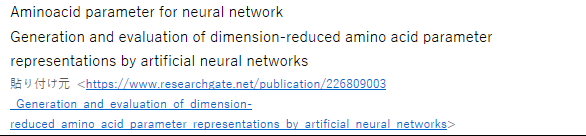


Dataset: 
Dataset was downloaded by 2015 Plos one supplimantal material, and delete some seaquences. total 239 peptide fragments.

Sequences derived from Amyloid_base
http://bioinfo.protres.ru/fold-amyloid/amyloid_base.html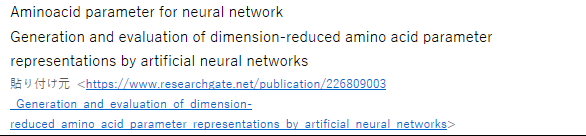


Parameter set:
Parameter of aminoacid is refferenced below

Aminoacid parameter for neural network
Generation and evaluation of dimension-reduced amino acid parameter representations by artificial neural networks
貼り付け元  <https://www.researchgate.net/publication/226809003_Generation_and_evaluation_of_dimension-reduced_amino_acid_parameter_representations_by_artificial_neural_networks> 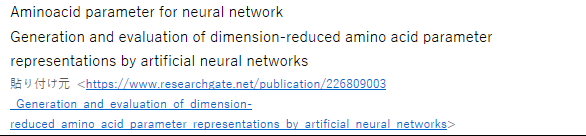

Steric parameter: The steric parameter is the graph shape index. This parameter encodes complexity, branching, and symmetry
of a group and can be calculated directly from the graph structure of the amino acid side chain.

Polarizability: The polarizability α is related to the molar refractivity.

Volume (van der Waals volume): The normalized van der Waals volume υv is defined by υv(side chain)=[V(side chain)–V(H)]/V(CH2). The measure is therefore 0 for glycine and 1 for alanine.

Hydrophobicity: The hydrophobicity π is defined as a side chain parameter as π(side chain)=log P(amino acid)–log P(glycine) in which P is the partition coefficient of the amino acid in octanol/water.

Isoelectric point: Charged status of functional group is related to the solubility of protein, In popularly, protein is most favored to form amyloid fibrils at the isoelectric point.

Helix and Sheet probability: The parameter of propensity to make helix and sheet structure.



Strategy
1. parameter of amino acid was set on the sequence
1-1. Aminoacid parameter was assigned on sequence (ald_parameter_set)
1-2. Created peptide parameter by merge the Aminoacid parameter (ald_parameter_merge_df02)

2. ML-prediction (Reg, rf, DL,)
2-1. GradientBoostingRegressor (ald_pred_reg, Score:0.78)
2-2. Randomforestclassifier (ald_pred_rf, Score:0.70)
2-3. DL (ald_pred_DL, Score is not determined)

3. Characterize the dataset
3-1. Aminoacid occurance on the peptide-position of dataset (ald_dataset_character)
3-2. pairwise correlation of aminoacid parameter (ald_parameter_merge)



2019.06.19
Normalized parameter uses for calculation

aminoacid parameter was normalized by min-max method(ald_parameter_normalize, df02_n).
trial ML-prediction was achieved in Reg, the score was no difference with non-normalized aminoacid parameter(ald_pred_reg_norm).
All calculated datafile was named as _n or _norm at the last of filename


2019.06.19
multiple dimension 

Strong correlation with poralizability and volume parameter, delete the volume parameter in dataset(44 -> 38, df03_n).
trial ML-presiction was achieved in Reg, the score was not changed with all data-set, polarizability(p6) was more contributing in variable importance.
(ald_pred_reg_norm-1)

2019.06.25
Parameter set of aminoacid sequence is not correctly joined by concat command, its rejoined correctly on index by merge command, and save it(ald_parameter_merge_norm, df04_n).
GradientBoostingRegressor recalculated(ald_pred_reg_norm-2, Score:0.58)


2019.06.25 - 8.11 finished

Project : More precise prediction with NN and augmented datasets of 2D-enlarged peptide parameter set
① 2D-enlargement of peptide parameter -> ②　Data Augmentation (ImageDatagenerator) -> ③ DL prediction by keras

① Aminoacid parameter dataframe (df04_n, 1D data, 36 frames) was dotted into 2D-dataframe(6×6 frames) by AA position and AA parameter.(ald_dataset_arrangement1)
Troubled: for-loop imaging process (and saved data separately) was not succeeded. -> resolved by teratail, the calculated 2D-dataframes was successfully saved as separate file in csv format (named matrix_One_No. or matrix_Zero_No. in "C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One or Zero")

② 2D-dataframes were exchanged into image-file(.png)(ald_dataset_arrangement3, 3-1).

③ DL prediction by keras
ImageDatagenerator is utilized by below links, the program is wrote in the last part in "ald_dataset_arrangement2"
ImageDataGenerator
https://keras.io/ja/preprocessing/image/
https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d#file-classifier_from_little_data_script_1-py-L33

DL-prediction was achieved and the data was evaluated by tensorboard, train accuracy was almost 0.90, and validation accuracy was almost 0.8 (190811,events.out.tfevents.1565494552.DESKTOP-HFML4EJ), Modelcheckpoint is used as load_model, the program was running at ald_dataset_arrangement4, but not worked.


Whole program of ald_dataset_arrangement 1-3 was collected in a ald_dataset_arrangement5.

